In [1]:
#Подключаем библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Читаем данные из файла
df = pd.read_csv("https://github.com/junaart/ForStudents/raw/master/Big_Data/Zachet/Computers.csv",delimiter=",")
df = df[["price", "speed", "hd", "ram"]]

#Отображаем данные
display(df)

,price,speed,hd,ram
0,1499,25,80,4
1,1795,33,85,2
2,1595,25,170,4
3,1849,25,170,8
4,3295,33,340,16
...,...,...,...,...
6254,1690,100,528,8
6255,2223,66,850,16
6256,2654,100,1200,24
6257,2195,100,850,16


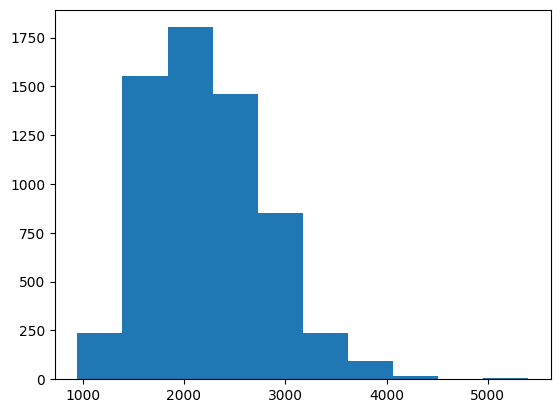

In [2]:
#Распределить компьютеры на группы по величине price, speed, ram, построить гистограммы. Сохранить полученные группировки в виде DataFrame.
gg=(plt.hist(df['price']))
group_price=[list(gg[0]),list(gg[1])]
plt.show()

In [3]:
df_price = pd.DataFrame(group_price)
display(df_price)

,0,1,2,3,4,5,6,7,8,9,10
0,237.0,1554.0,1803.0,1459.0,850.0,238.0,92.0,18.0,3.0,5.0,NaN
1,949.0,1394.0,1839.0,2284.0,2729.0,3174.0,3619.0,4064.0,4509.0,4954.0,5399.0


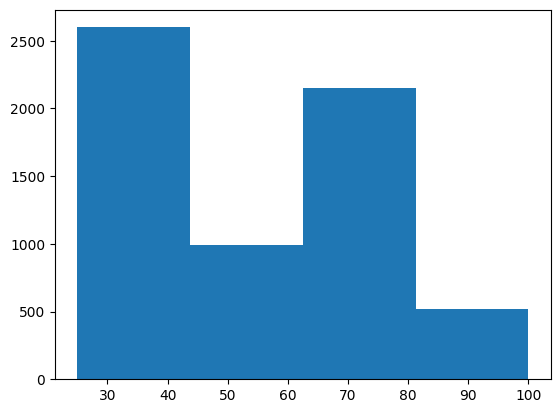

In [4]:
gg=(plt.hist(df['speed'], bins = 4))
group_speed=[list(gg[0]),list(gg[1])]
plt.show()

In [5]:
df_speed = pd.DataFrame(group_speed)
display(df_speed)

,0,1,2,3,4
0,2599.0,994.00,2150.0,516.00,NaN
1,25.0,43.75,62.5,81.25,100.0


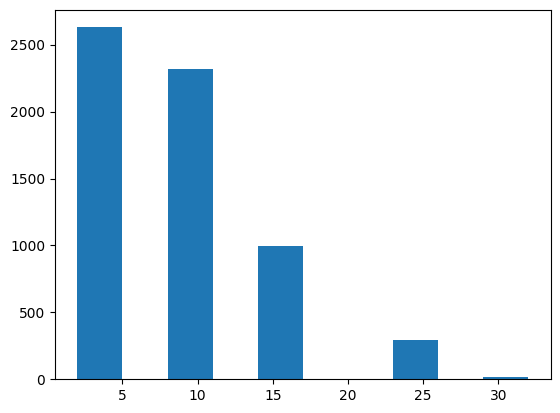

In [6]:
gg=(plt.hist(df['ram']))
group_ram=[list(gg[0]),list(gg[1])]
plt.show()

In [7]:
df_ram = pd.DataFrame(group_ram)
display(df_ram)

,0,1,2,3,4,5,6,7,8,9,10
0,2630.0,0.0,2320.0,0.0,996.0,0.0,0.0,297.0,0.0,16.0,NaN
1,2.0,5.0,8.0,11.0,14.0,17.0,20.0,23.0,26.0,29.0,32.0


In [8]:
#Определить объемные показатели по каждой группе при группировке по величине speed: суммарные, средние группы, а также размах вариации, среднее линейное отклонение, межквартильный размах внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.
import math
group_value = pd.DataFrame(columns = ["Суммарное", "Среднее", "Размах вариаций", "Средн. лин. откл.", "Межкварт. размах"])
data_group=[]
for i in range(len(group_speed[0])):
    data_group.append(df[(group_speed[1][i]<=df["speed"]) & (df["speed"]<=group_speed[1][i + 1])]["speed"])
    Sum_in = len(data_group[i])
    Avg_in = data_group[i].mean()
    Scope_in = data_group[i].max() - data_group[i].min()
    Sld_in = (abs(data_group[i] - data_group[i].mean())).sum()/len(data_group[i])
    Interquart_in = data_group[i].quantile(.75) - data_group[i].quantile(.25)
    group_value = pd.concat([pd.DataFrame([[Sum_in, Avg_in, Scope_in, Sld_in, Interquart_in]], columns=group_value.columns), group_value], ignore_index=True)
display(group_value)

,Суммарное,Среднее,Размах вариаций,Средн. лин. откл.,Межкварт. размах
0,516,100.000000,0,0.000000,0.0
1,2150,66.510698,9,0.963437,0.0
2,994,50.000000,0,0.000000,0.0
3,2599,31.257791,8,2.725594,0.0


In [9]:
#Определить объемные показатели по каждой группе при группировке по price: суммарный, средний, медианный показатели, а также дисперсию, среднее квадратическое отклонение, среднее линейное отклонение от медианного значения, относительные показатели вариации: коэффициент осцилляции, коэффициент вариации внутри каждой группы. Результаты расчета оформить в виде DataFrame с его последующим сохранением.
st_group = pd.DataFrame(columns = ["Суммарное", "Среднее", "Медианное", "Дисперсия", "Средн. квадр. откл.", "Средн. лин. откл.", "Коэф.осц.", "Коэф.вар."])
data_group=[]
for i in range(len(group_price[0])):
    data_group.append(df[(group_price[1][i]<=df["price"]) & (df["price"]<=group_price[1][i + 1])]["price"])
    Sum_in = len(data_group[i])
    Avg_in = data_group[i].mean()
    Med_in = data_group[i].median()
    D_in = data_group[i].var()
    Std_in = data_group[i].std()
    Sld_in = (abs(data_group[i] - data_group[i].mean())).sum()/len(data_group[i])
    Ko_in = (data_group[i].max() - data_group[i].min())/Avg_in*100
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = pd.concat([pd.DataFrame([[Sum_in, Avg_in, Med_in, D_in, Std_in, Sld_in, Ko_in, Kv_in]], columns=st_group.columns), st_group], ignore_index=True)
display(st_group)

,Суммарное,Среднее,Медианное,Дисперсия,Средн. квадр. откл.,Средн. лин. откл.,Коэф.осц.,Коэф.вар.
0,5,5239.000000,5399.0,48000.000000,219.089023,192.000000,7.635045,4.181886
1,3,4695.666667,4694.0,10508.333333,102.510162,68.888889,4.365727,2.183080
2,18,4276.611111,4270.0,17242.133987,131.309307,107.833333,9.353200,3.070406
3,92,3831.815217,3799.0,14967.229216,122.340628,107.502836,10.960863,3.192759
4,238,3356.920168,3342.0,17687.643389,132.994900,114.290269,12.928517,3.961813
5,850,2920.537647,2899.0,14706.868428,121.271878,105.371272,15.065719,4.152382
6,1461,2482.290212,2490.0,17020.028048,130.460830,113.091500,17.886708,5.255664
7,1803,2043.653910,2040.0,15238.138757,123.442856,106.905948,21.530064,6.040301
8,1559,1630.513149,1644.0,17070.559358,130.654351,113.872329,27.230691,8.013082
9,237,1276.316456,1295.0,6626.293499,81.402048,62.050206,34.552559,6.377889


In [10]:
#Рассчитать средние показатели и показатели вариации по несгруппированным данным: среднее арифметическое, среднее геометрическое, среднее геометрическое, медиана, дисперию, среднее квадратическое отклонение, коэффициент вариации по показателям price, hd, ram, speed. Построить для них диаграмму "ящик с усами" Сделать выводы об однородности статистических совокупностей. Сравнить показатели вариации на несгруппированной совокупности с показателями вариации на сгруппированных совокупностях.
from scipy import stats

for column in list(df.columns.values):
    print("Столбец {}:".format(column))
    print("Среднее арифметическое:", df[column].mean())
    print("Среднее геометрическое:", stats.gmean(df[column]))
    print("Среднее гармоническое:", stats.hmean(df[column]))
    print("Медианное значение:", df[column].median())
    print("Дисперсия:", df[column].var())
    print("Среднее квадратическое отклонение:", df[column].std())
    print("Коэффициент вариации:", df[column].std()/df[column].mean()*100)
    print('\n')

Столбец price:
Среднее арифметическое: 2219.576609682058
Среднее геометрическое: 2146.878393246609
Среднее гармоническое: 2076.942004982264
Медианное значение: 2144.0
Дисперсия: 337333.23490183085
Среднее квадратическое отклонение: 580.8039556527063
Коэффициент вариации: 26.167330882798556


Столбец speed:
Среднее арифметическое: 52.011024125259624
Среднее геометрическое: 47.912718623499686
Среднее гармоническое: 44.18949449308106
Медианное значение: 50.0
Дисперсия: 447.64976659241887
Среднее квадратическое отклонение: 21.157735384308474
Коэффициент вариации: 40.67932854648987


Столбец hd:
Среднее арифметическое: 416.60169356127176
Среднее геометрическое: 346.6778310719971
Среднее гармоническое: 285.5428720358123
Медианное значение: 340.0
Дисперсия: 66847.29850144588
Среднее квадратическое отклонение: 258.5484451731356
Коэффициент вариации: 62.061304399164555


Столбец ram:
Среднее арифметическое: 8.286946796612877
Среднее геометрическое: 6.756650982388836
Среднее гармоническое: 5.582

In [11]:
#Оценить коэффициенты ассиметрии и эксцесса по показателям price, speed, ram, hd.
def rate_koeff_assim(ka):
    if (ka == 0):
        print("Распределение нормальное.")

    if (ka < 0):
        print("Распределение скошено влево.")

    if (ka > 0):
        print("Распределение скошено вправо.")

    if ((ka < 0) or (ka > 0)):
        if (abs(ka) < 0.25):
            print("Ассиметрия незначительная.")
        elif (abs(ka) < 0.5):
            print("Ассиметрия умеренная.")
        else:
            print("Ассиметрия существенная.")

def rate_koeff_eksc(ke):
    if (ke == 0):
        print("Распределение нормальное.")

    if (ke < 0):
        print("Распределение плосковершинно.")

    if (ke > 0):
        print("Распределение островершинно.")

for column in list(df.columns.values):
    ka = (((df[column]-df[column].mean())**3).sum()/len(df[column]))/(df[column].std()**3)
    print("Моментный коэффициент асимметрии столбца {0} равен {1}.".format(column, ka))
    rate_koeff_assim(ka)
    print('\n')

for column in list(df.columns.values):
    ke = (((((df[column]-df[column].mean())**4).sum()/len(df[column]))/(df[column].std()**4))-3)
    print("Коэффициент эксцесса столбца {0} равен {1}.".format(column, ke))
    rate_koeff_eksc(ke)
    print('\n')

Моментный коэффициент асимметрии столбца price равен 0.711383647754141.
Распределение скошено вправо.
Ассиметрия существенная.


Моментный коэффициент асимметрии столбца speed равен 0.656693097846473.
Распределение скошено вправо.
Ассиметрия существенная.


Моментный коэффициент асимметрии столбца hd равен 1.3773585268446005.
Распределение скошено вправо.
Ассиметрия существенная.


Моментный коэффициент асимметрии столбца ram равен 1.3855376429645123.
Распределение скошено вправо.
Ассиметрия существенная.


Коэффициент эксцесса столбца price равен 0.7276837783258712.
Распределение островершинно.


Коэффициент эксцесса столбца speed равен -0.2770616203994325.
Распределение плосковершинно.


Коэффициент эксцесса столбца hd равен 2.4477976473179215.
Распределение островершинно.


Коэффициент эксцесса столбца ram равен 1.4586988081968997.
Распределение островершинно.




In [12]:
#Рассчитать эмпирическое корреляционное отношение между величиной speed и ram
group=np.histogram(df['speed'],bins=5)
st_group = pd.DataFrame(columns = ["Внут.средняя",  "Внутригрупповая дисперсия","Вес группы", "Коэф.вар."])
data_group=[]
for i in range(len(group[0])):
    data_group.append(df[(group[1][i]<=df['speed']) & (df['speed']<=group[1][i + 1])]['ram'])
    Avg_in = data_group[i].mean()
    D_in=data_group[i].std()**2
    Kv_in = math.sqrt(D_in)/Avg_in*100
    st_group = pd.concat([pd.DataFrame([[Avg_in, D_in, len(data_group[i]), Kv_in]], columns=st_group.columns), st_group], ignore_index=True)
display(st_group)

D = df['ram'].var()
D_in_avg = (st_group['Внутригрупповая дисперсия']*st_group['Вес группы']).sum()/st_group['Вес группы'].sum()
corell = math.sqrt(1 - (D_in_avg/D))
print("Коэффициент корреляции столбцов speed и ram равен", corell)

,Внут.средняя,Внутригрупповая дисперсия,Вес группы,Коэф.вар.
0,11.166667,39.715858,516,56.436285
1,12.016393,71.239398,122,70.240239
2,9.085799,28.628057,2028,58.888815
3,7.845070,29.740323,994,69.514595
4,7.085802,27.170079,2599,73.562491


Коэффициент корреляции столбцов speed и ram равен 0.23594933008648403


In [13]:
#Рассчитать и отобразить корреляционную матрицу с использованием коэффициентов корреляции Пирсона, Спирмена и Кендалла, оценить их статистическую значимость.
def rate_correlation(coeff):
    if (abs(coeff) < 0.2):
        print("Очень слабая связь.")
    elif (abs(coeff) < 0.3):
        print("Слабая связь.")
    elif (abs(coeff) < 0.5):
        print("Умеренная связь.")
    elif (abs(coeff) < 0.8):
        print("Связь средней силы.")
    else:
        print("Сильная связь, близкая к функциональной.")

#Корреляционная матрица по коэффициенту Пирсона
df_corr = df.corr("pearson")
display(df_corr.style.background_gradient())

col = list(df_corr.columns.values)
row = list(df_corr.index.values)
for i in range(0, len(col)):
    for j in range(i+1, len(row)):
        print("Столбец {} и столбец {}. Значение: {}".format(col[i], row[j], df_corr.iloc[i,j]))
        rate_correlation(df_corr.iloc[i,j])
        print('\n')

,price,speed,hd,ram
price,1.000000,0.300976,0.430258,0.622748
speed,0.300976,1.000000,0.372304,0.234760
hd,0.430258,0.372304,1.000000,0.777726
ram,0.622748,0.234760,0.777726,1.000000


Столбец price и столбец speed. Значение: 0.3009764588821227
Умеренная связь.


Столбец price и столбец hd. Значение: 0.430257793966347
Умеренная связь.


Столбец price и столбец ram. Значение: 0.6227482447545002
Связь средней силы.


Столбец speed и столбец hd. Значение: 0.3723041010371999
Умеренная связь.


Столбец speed и столбец ram. Значение: 0.23476049616671804
Слабая связь.


Столбец hd и столбец ram. Значение: 0.7777262994202844
Связь средней силы.




In [14]:
#Корреляционная матрица по коэффициенту Кендалла
df_corr = df.corr("kendall")
display(df_corr.style.background_gradient())

col = list(df_corr.columns.values)
row = list(df_corr.index.values)
for i in range(0, len(col)):
    for j in range(i+1, len(row)):
        print("Столбец {} и столбец {}. Значение: {}".format(col[i], row[j], df_corr.iloc[i,j]))
        rate_correlation(df_corr.iloc[i,j])
        print('\n')

,price,speed,hd,ram
price,1.000000,0.243851,0.321161,0.535661
speed,0.243851,1.000000,0.318497,0.245511
hd,0.321161,0.318497,1.000000,0.679315
ram,0.535661,0.245511,0.679315,1.000000


Столбец price и столбец speed. Значение: 0.24385127569798923
Слабая связь.


Столбец price и столбец hd. Значение: 0.321161156206527
Умеренная связь.


Столбец price и столбец ram. Значение: 0.5356610161473646
Связь средней силы.


Столбец speed и столбец hd. Значение: 0.3184968130176652
Умеренная связь.


Столбец speed и столбец ram. Значение: 0.24551097211002998
Слабая связь.


Столбец hd и столбец ram. Значение: 0.6793153683722265
Связь средней силы.




In [15]:
#Корреляционная матрица по коэффициенту Спирмена
df_corr = df.corr("spearman")
display(df_corr.style.background_gradient())

col = list(df_corr.columns.values)
row = list(df_corr.index.values)
for i in range(0, len(col)):
    for j in range(i+1, len(row)):
        print("Столбец {} и столбец {}. Значение: {}".format(col[i], row[j], df_corr.iloc[i,j]))
        rate_correlation(df_corr.iloc[i,j])
        print('\n')

,price,speed,hd,ram
price,1.000000,0.325821,0.458673,0.673002
speed,0.325821,1.000000,0.405424,0.289958
hd,0.458673,0.405424,1.000000,0.790146
ram,0.673002,0.289958,0.790146,1.000000


Столбец price и столбец speed. Значение: 0.3258209025871182
Умеренная связь.


Столбец price и столбец hd. Значение: 0.45867266398291084
Умеренная связь.


Столбец price и столбец ram. Значение: 0.6730017843163191
Связь средней силы.


Столбец speed и столбец hd. Значение: 0.40542405232479406
Умеренная связь.


Столбец speed и столбец ram. Значение: 0.2899579796902071
Слабая связь.


Столбец hd и столбец ram. Значение: 0.7901458142881237
Связь средней силы.


